In [4]:
%matplotlib inline

# Pandas
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pylab as plt

# Farben von Pyplot
from matplotlib.colors import ListedColormap

# Numpy (performante listen)
import numpy as np

In [45]:
df = pd.read_csv('exams.csv')

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [47]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


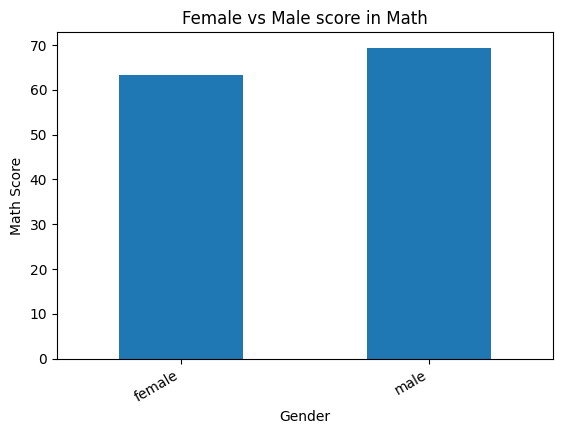

In [25]:
df = df.dropna()
fig, ax = plt.subplots()

counts = df.groupby('gender')['math score'].mean()
counts = counts.sort_index()
counts.plot(kind='bar')

fig.autofmt_xdate()
plt.ylabel('Math Score')
plt.xlabel('Gender')
plt.title('Female vs Male score in Math')
plt.show()

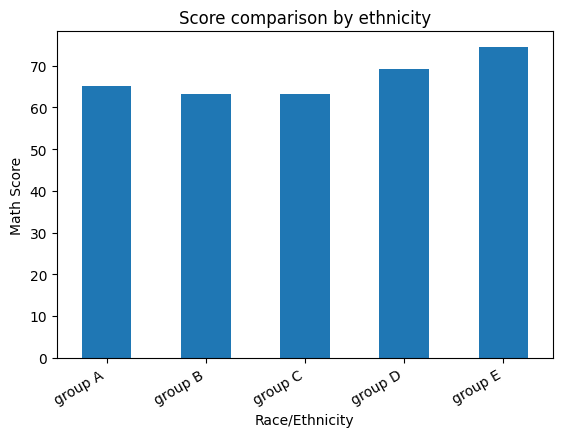

In [27]:
# Comparing grades by ethnicity

df = df.dropna()
fig, ax = plt.subplots()

counts = df.groupby('race/ethnicity')['math score'].mean()
counts = counts.sort_index()
counts.plot(kind='bar')

fig.autofmt_xdate()
plt.ylabel('Math Score')
plt.xlabel('Race/Ethnicity')
plt.title('Score comparison by ethnicity')
plt.show()

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68  
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.

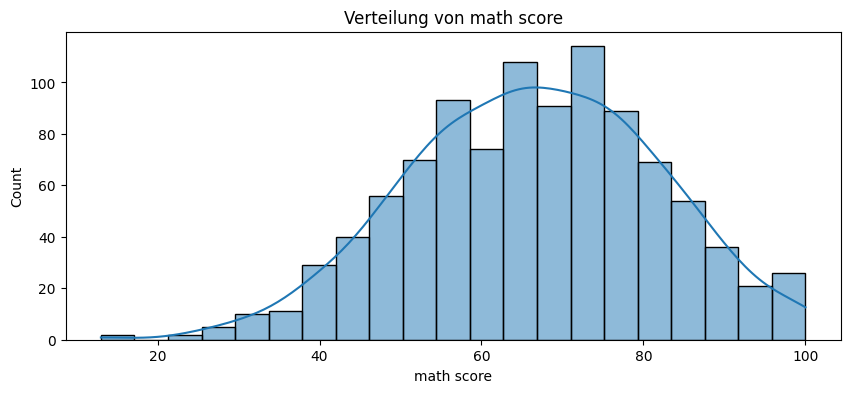

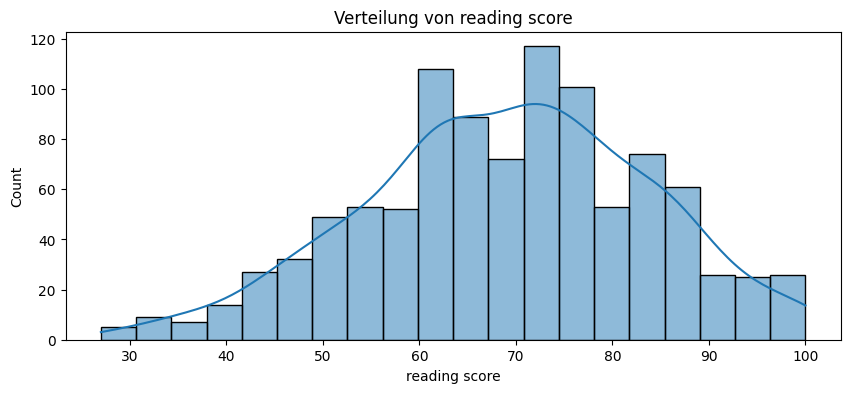

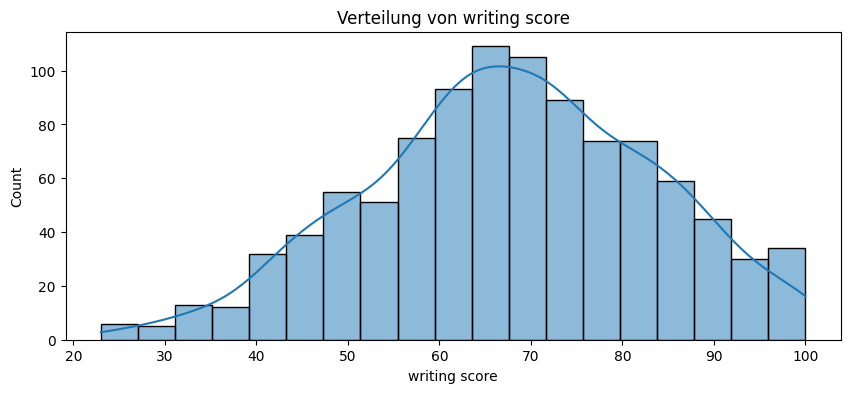

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


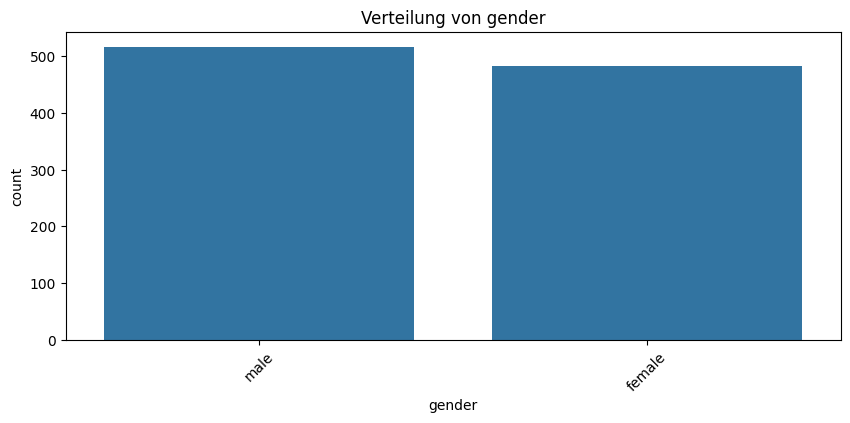

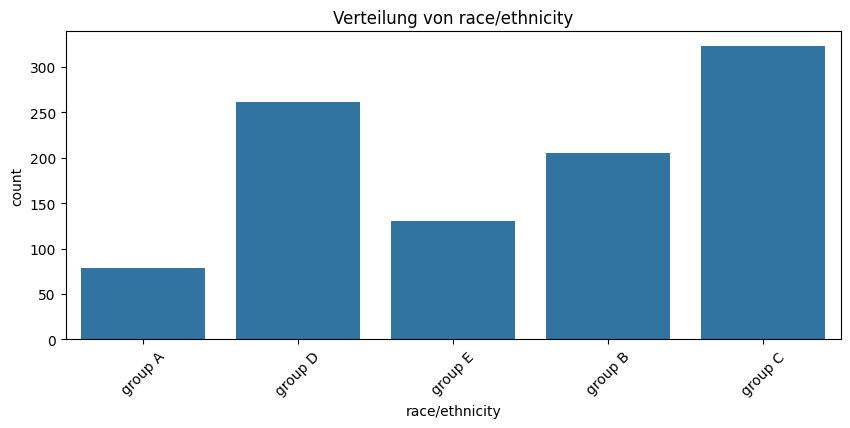

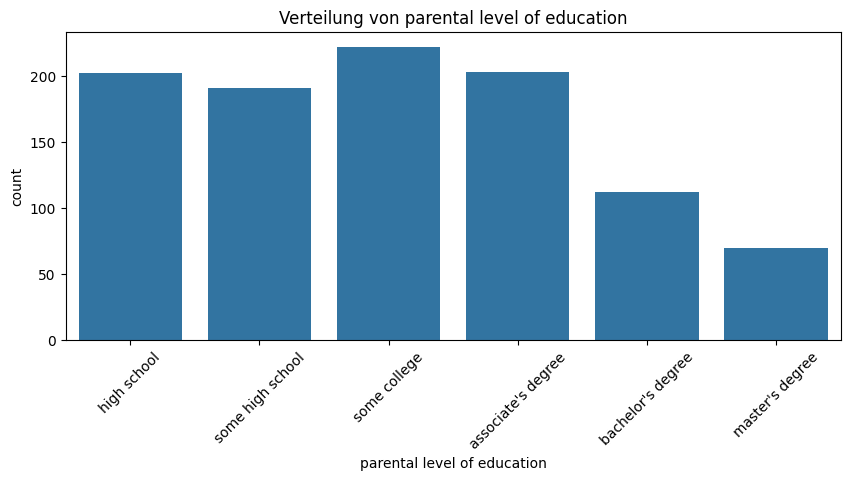

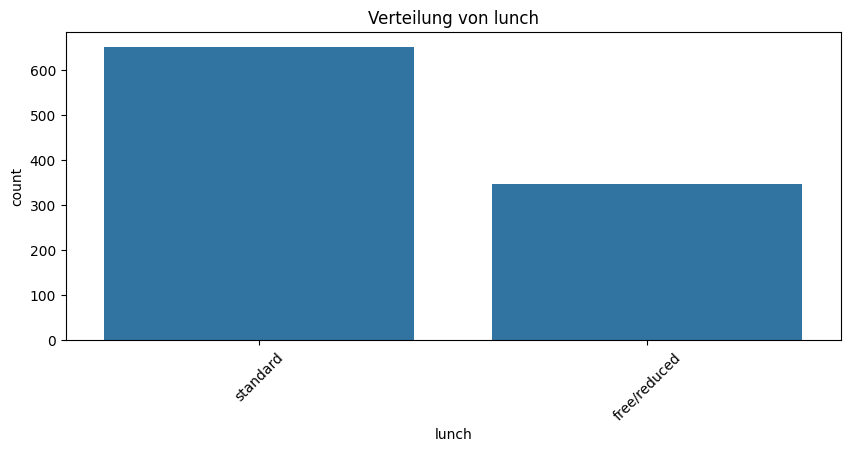

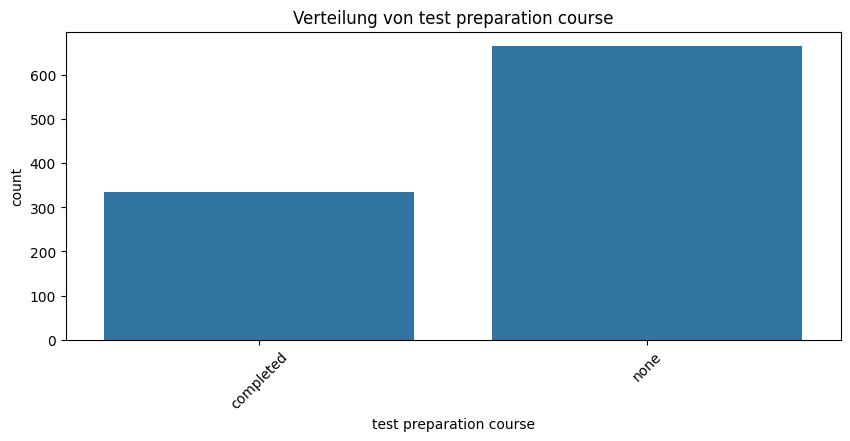

In [29]:
df = pd.read_csv('exams.csv')

# Grundlegende Datenüberprüfung
print(df.head())
print(df.describe())
print(df.info())

# Verteilung der numerischen Variablen
for column in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(10,4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Verteilung von {column}')
    plt.show()

# Überprüfung auf fehlende Werte
print(df.isnull().sum())

# Verteilung der kategorischen Variablen
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    plt.figure(figsize=(10,4))
    sns.countplot(x=column, data=df)
    plt.title(f'Verteilung von {column}')
    plt.xticks(rotation=45)
    plt.show()


                         math score  reading score  writing score
test preparation course                                          
completed                 69.686567      74.089552      74.671642
none                      64.738346      66.439098      64.245113
                         math score  reading score  writing score
test preparation course                                          
completed                 69.686567      74.089552      74.671642
none                      64.738346      66.439098      64.245113
                             math score  reading score  writing score
parental level of education                                          
associate's degree            69.536946      70.985222      70.113300
bachelor's degree             71.491071      74.008929      74.410714
high school                   65.207921      67.400990      64.846535
master's degree               71.585714      75.428571      75.885714
some college                  65.297297      68.0450

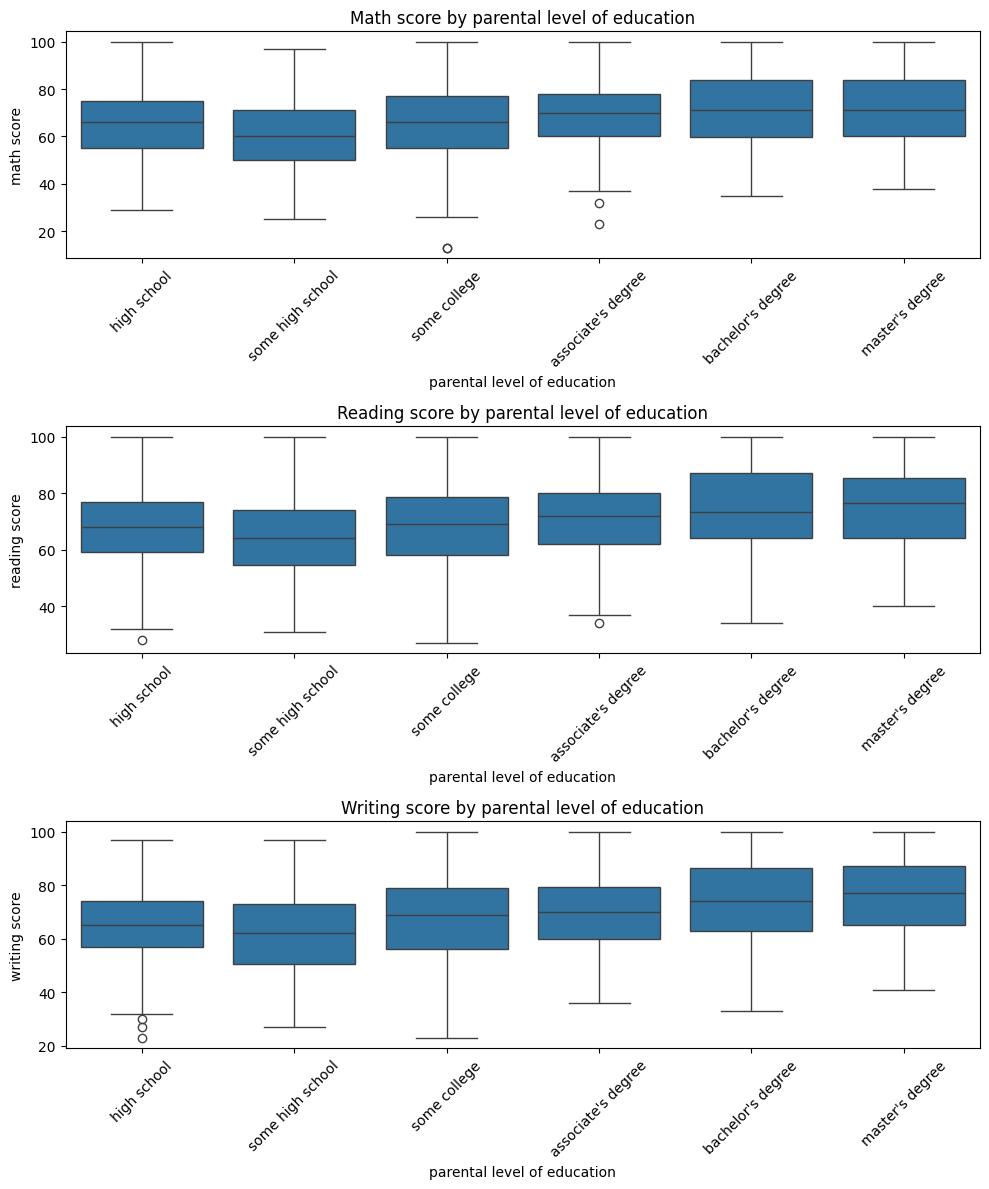

In [57]:
from scipy import stats
df = pd.read_csv('exams.csv')

prep_course_group = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(prep_course_group)

prep_course_group = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(prep_course_group)

parent_edu_group = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
print(parent_edu_group)

for score in ['math score', 'reading score', 'writing score']:
    t_stat, p_val = stats.ttest_ind(df[df['gender'] == 'female'][score],
                                    df[df['gender'] == 'male'][score])
    print(f"{score} - T-Statistik: {t_stat}, P-Wert: {p_val}")

plt.figure(figsize=(10,12))

plt.subplot(3, 1, 1)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math score by parental level of education')

plt.subplot(3, 1, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.xticks(rotation=45)
plt.title('Reading score by parental level of education')

plt.subplot(3, 1, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.xticks(rotation=45)
plt.title('Writing score by parental level of education')

plt.tight_layout()
plt.show()


MSE für Mathematik-Modell: 164.3091015625


Text(0.5, 1.0, 'Vorhersage Mathematik-Ergebnis')

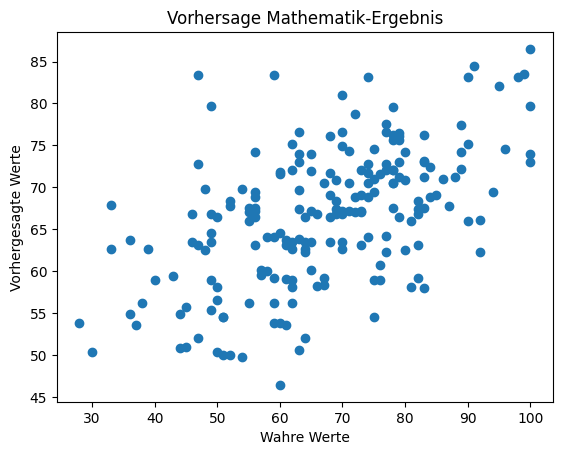

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modell für Mathematik-Ergebnis
X = pd.get_dummies(df.drop(['math score', 'reading score', 'writing score'], axis=1))
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE für Mathematik-Modell: {mean_squared_error(y_test, y_pred)}')
plt.scatter(y_test, y_pred)
plt.xlabel('Wahre Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersage Mathematik-Ergebnis')